# Phase 1
Task: With the classification_data, build an algorithm to predict the binary label. Build a pipeline going from exploratory analysis to model performance evaluation adding comments to each stage

In [100]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

### Exploratory Data Analysis (EDA)

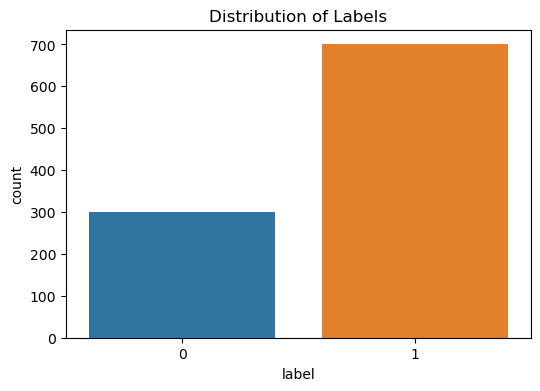

In [101]:
# Load the dataset
df = pd.read_csv('classification_data.csv')

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

In [102]:
#view the data to understand the different column names
df.head()

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,586266,1,1,18,4,2,1049,1,2,4,...,4,2,21,3,1,1,3,1,1,1
1,392565,1,1,9,4,0,2799,1,3,2,...,2,1,36,3,1,2,3,2,1,1
2,204665,1,2,12,2,9,841,2,4,2,...,4,1,23,3,1,1,2,1,1,1
3,393307,1,1,12,4,0,2122,1,3,3,...,2,1,39,3,1,2,2,2,1,2
4,627375,1,1,12,4,0,2171,1,3,4,...,4,2,38,1,2,2,2,1,1,2


In [103]:
df.describe()

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,396518.897000,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,225382.045777,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,505.000000,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201780.000000,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,395127.500000,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,586323.000000,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,797738.000000,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


Insights:
1. Loan Scores: The average loan score is moderately high, but there's a wide range in creditworthiness among users.
2. Device Ratings: Users' devices vary, with most users having mid-range devices, possibly an indicator of socioeconomic status.
3. Data Quality: Some users have incomplete data, which could indicate lower engagement or missing details in their profiles.
4. LTV Rates: There is a mix of low-risk and high-risk users.
5. Tenure: Some users have been long-term, active customers, while others are new.
6. Savings and Transaction Scores: Most users have strong savings habits and are moderately active in their transactions, making them reliable users.


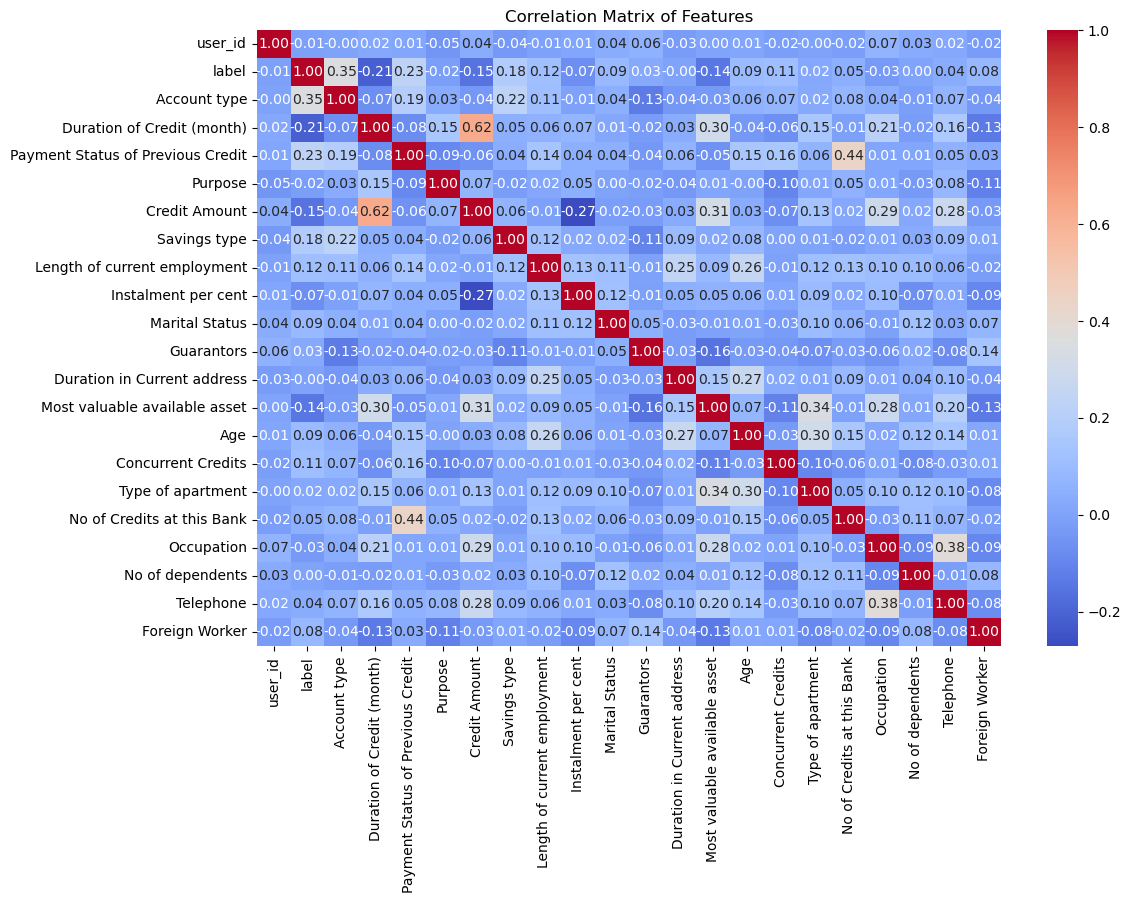

In [104]:
# lets build Correlation matrix , to check if there are relation between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

### Feature Engineering

In [105]:
# Encode categorical variables
categorical_columns = ['Account type', 'Payment Status of Previous Credit', 'Purpose', 'Savings type', 
                       'Marital Status', 'Most valuable available asset', 'Concurrent Credits', 
                       'Type of apartment', 'Occupation', 'Telephone', 'Foreign Worker']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [106]:
# Drop user_id as it is irrelevant for prediction
df = df.drop('user_id', axis=1)

# Splitting the data into features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying smote to tackle data imbalance

In [107]:
# Apply SMOTE to tackle data imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

(array([238.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 562.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

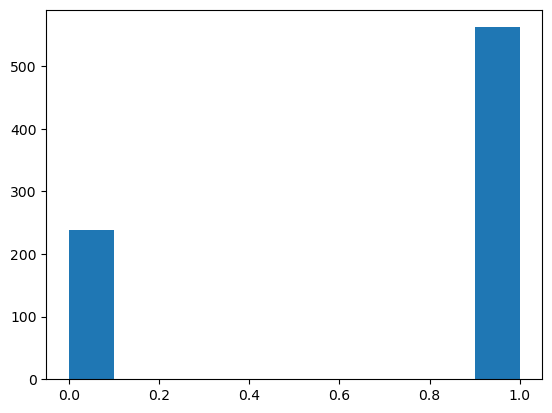

In [108]:
# check for data imbalance
#Before SMOTE
plt.hist(y_train, label='Original') 

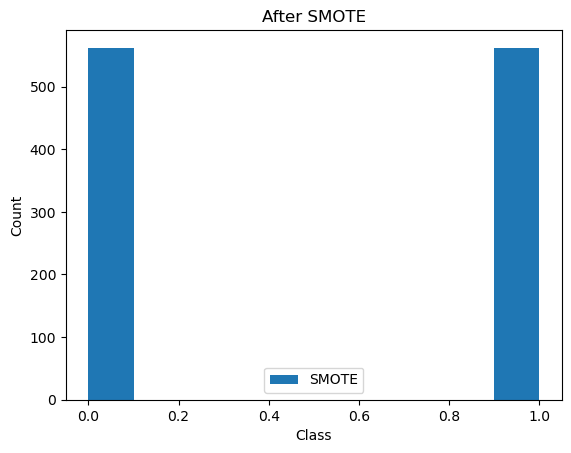

In [109]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# After SMOTE
plt.hist(y_train_smote, label='SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('After SMOTE')
plt.legend()
plt.show()

In [110]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### Building Model

In [111]:
# Initialize the models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

In [112]:
# Train the models
log_reg.fit(X_train_scaled, y_train_smote)
rf_clf.fit(X_train_scaled, y_train_smote)
xgb_clf.fit(X_train_scaled, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Predictions

In [85]:
# Predict on test data
log_reg_preds = log_reg.predict(X_test_scaled)
rf_clf_preds = rf_clf.predict(X_test_scaled)
xgb_clf_preds = xgb_clf.predict(X_test_scaled)

In [115]:
# label predictions for one of the models
print(xgb_clf_preds)

[0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0]


### Model Evaluation

In [86]:
# Evaluate model performance
def evaluate_model(y_test, preds, model_name):
    print(f"Performance metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall: {recall_score(y_test, preds):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, preds):.4f}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, preds)}\n")

In [87]:
# Evaluate all models
evaluate_model(y_test, log_reg_preds, "Logistic Regression")
evaluate_model(y_test, rf_clf_preds, "Random Forest")
evaluate_model(y_test, xgb_clf_preds, "XGBoost")

Performance metrics for Logistic Regression:
Accuracy: 0.7600
Precision: 0.8358
Recall: 0.8116
ROC-AUC: 0.7284
Confusion Matrix: 
[[ 40  22]
 [ 26 112]]

Performance metrics for Random Forest:
Accuracy: 0.7850
Precision: 0.8369
Recall: 0.8551
ROC-AUC: 0.7421
Confusion Matrix: 
[[ 39  23]
 [ 20 118]]

Performance metrics for XGBoost:
Accuracy: 0.7600
Precision: 0.8358
Recall: 0.8116
ROC-AUC: 0.7284
Confusion Matrix: 
[[ 40  22]
 [ 26 112]]



### Summary of model performance and Interpretation

# Phase 2

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
df = pd.read_csv('users_data.csv')

# Step 1: Exploratory Data Analysis (EDA)
print("Dataset Info:")
# Step 1: Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())

Dataset Info:
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        1599 non-null   int64  
 1   loan_score     1599 non-null   float64
 2   device_rating  1599 non-null   float64
 3   data_quality   1599 non-null   float64
 4   ltv_rate       1599 non-null   float64
 5   bureau_score   1599 non-null   float64
 6   total_tenure   1599 non-null   float64
 7   months_active  1599 non-null   float64
 8   savings_score  1599 non-null   float64
 9   tx_score       1599 non-null   float64
 10  usage_score    1599 non-null   float64
 11  airtime_score  1599 non-null   float64
 12  cluster        0 non-null      float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB
None


In [117]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handling missing values: Option 1 - Fill with the median or mean (depending on your preference)
df_clean = df.fillna(df.median())


Missing values per column:
user_id             0
loan_score          0
device_rating       0
data_quality        0
ltv_rate            0
bureau_score        0
total_tenure        0
months_active       0
savings_score       0
tx_score            0
usage_score         0
airtime_score       0
cluster          1599
dtype: int64


In [118]:
print(np.isnan(df_scaled).sum())

0


In [119]:
# Handling infinite values (replace with NaN and then handle them)
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# If there are still NaNs after replacement, fill them
df_clean.fillna(df_clean.median(), inplace=True)

# Step 2: Preprocessing
# Dropping any non-relevant columns like IDs (if applicable)
df_clean = df_clean.drop(columns=['user_id'], errors='ignore')

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


/Users/khalidyusufliman/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/khalidyusufliman/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/khalidyusufliman/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


### Clustering: Creating four clusters 

In [120]:
# Check for NaN values after scaling
if np.isnan(df_scaled).any():
    print("Warning: NaN values found after scaling. Please investigate further.")
    # Handle NaN values in df_scaled (e.g., impute or remove rows/columns)
    df_scaled = np.nan_to_num(df_scaled) # Example: Replace NaN with 0
else:
    print("No NaN values found after scaling.")

#Step 3: Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [121]:
#We need to remove the missing values one more time
df_scaled = np.nan_to_num(df_scaled)

In [122]:
#check again if there are still missing values
print(np.isnan(df_scaled).sum())

0


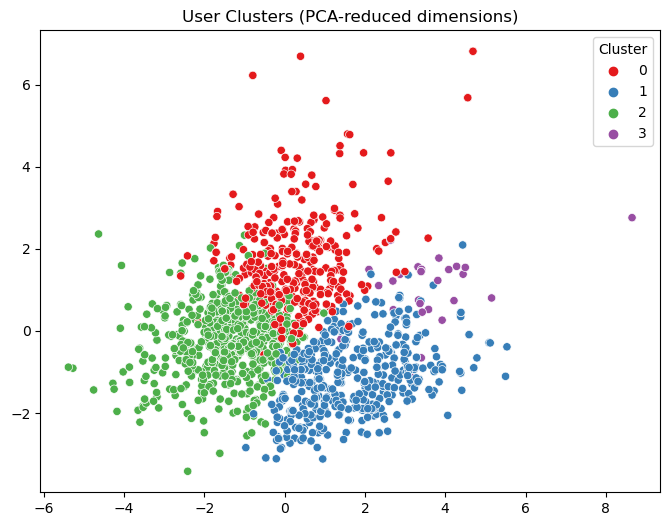


Cluster Analysis:
               user_id  loan_score  device_rating  data_quality  ltv_rate  \
Cluster                                                                     
0        407533.591029    8.163061       0.533588      0.290607  3.097230   
1        407652.020921   10.119665       0.394498      0.469226  2.610356   
2        388610.921459    7.190603       0.614173      0.118612  2.216900   
3        326909.793103    8.455172       0.526897      0.492759  1.975862   

         bureau_score  total_tenure  months_active  savings_score  tx_score  \
Cluster                                                                       
0            0.086644     27.183377      89.353562       0.997270  3.286544   
1            0.084366     10.648536      28.847280       0.997545  3.206025   
2            0.079086     13.396213      34.767181       0.995920  3.405428   
3            0.355379     15.172414      64.103448       0.997077  3.045517   

         usage_score  airtime_score  cluste

In [123]:
# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 4: PCA for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("User Clusters (PCA-reduced dimensions)")
plt.show()

# Step 5: Analyze Clusters
# Print the mean values of each feature for each cluster to interpret them
cluster_analysis = df.groupby('Cluster').mean()
print("\nCluster Analysis:")
print(cluster_analysis)

### Summary and Interpretation


### Key Observations:

1. Loan Score: Cluster 1 stands out with the highest average loan score (10.12), significantly higher than Cluster 0 (8.16) and Cluster 2 (7.19). This suggests Cluster 1 might represent users with excellent creditworthiness.
2. Device Rating: Cluster 2 has the highest average device rating (0.61), indicating users in this cluster might have newer or better-maintained devices compared to Cluster 0 (0.53) and Cluster 1 (0.39).
3. Data Quality: Cluster 1 has the best data quality (0.47), followed by Cluster 0 (0.29) and Cluster 2 (0.12). This could imply that users in Cluster 1 provide more accurate or complete information.
4. LTV Rate: Cluster 0 has the highest LTV rate (3.10), suggesting users in this cluster might have higher loan amounts relative to the value of their collateral (if applicable). Cluster 1 and Cluster 2 have lower LTV rates (2.61 and 2.22, respectively).

### Possible Cluster Profiles:

1. Cluster 0: Higher Risk, Potentially Higher Value: These users have good loan scores but the highest LTV rate, indicating a higher risk profile. They also have average device ratings and data quality. They might represent users who are willing to take on more debt or have higher borrowing needs.
2. Cluster 1: Low Risk, High Quality: These users have excellent loan scores, and good data quality, but lower device ratings. This cluster might represent financially responsible users who are less focused on having the latest devices.
3. Cluster 2: Moderate Risk, Tech-Savvy: These users have the lowest loan scores but the highest device ratings. Their data quality is the lowest. This cluster could represent users who prioritize technology but might have some financial challenges
4. Cluster 3: Stable, high-credit-score users with very high usage and low-risk borrowing behaviour, representing premium or reliable customers
   
### Summary and Interpretation:
1. Cluster 0: Long-tenured users with moderately high loan risk but stable savings and transaction behaviour.
2. Cluster 1: Newer, high-credit-score users with strong engagement and financial habits but lower device ratings.
3. Cluster 2: Users with lower credit scores but cautious loan behaviour, taking smaller, lower-risk loans with higher transaction activity.
4. Cluster 3: Stable, high-credit-score users with very high usage and low-risk borrowing behaviour, representing premium or reliable customers